In [ ]:
# pipenv install scikit-learn scipy pandas matplotlib statsmodels fastapi uvicorn pydantic pingouin seaborn ipykernel

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot 

# Carga dos dados

In [2]:
# Carregar dataset
df_pontuacao = pd.read_csv(".\datasets\pontuacao_teste.csv")

In [3]:
# Estrutura dataset
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# Visualizar topo
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
# Visualizar final 
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


# EDA

In [6]:
# Medidas estatisticas das variaveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

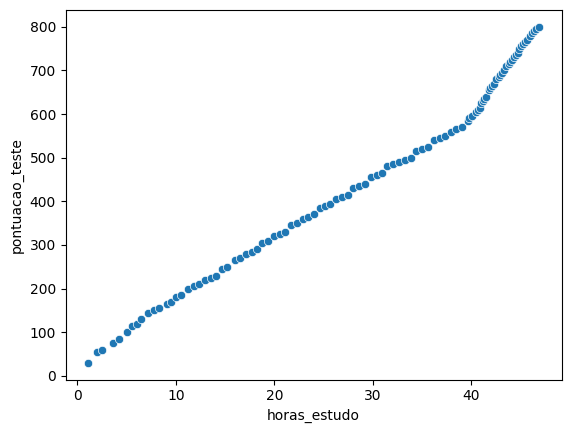

In [7]:
# plot de dispersao
# x = horas de estudos e y = pontuacao

sns.scatterplot(data=df_pontuacao, x='horas_estudo', y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

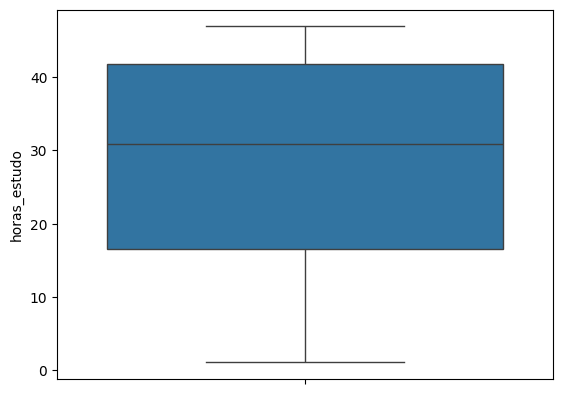

In [8]:
# Verificar se temos outliers
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

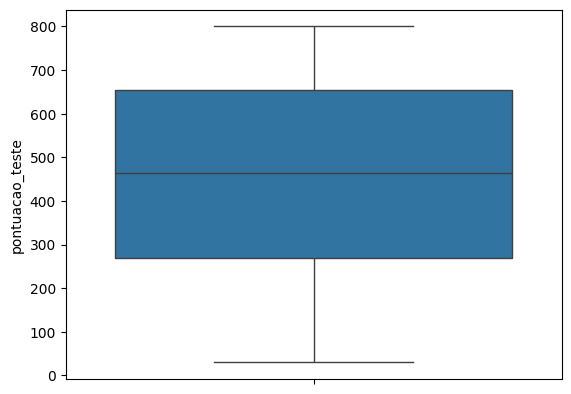

In [9]:
sns.boxplot(df_pontuacao, y='pontuacao_teste')

<Axes: >

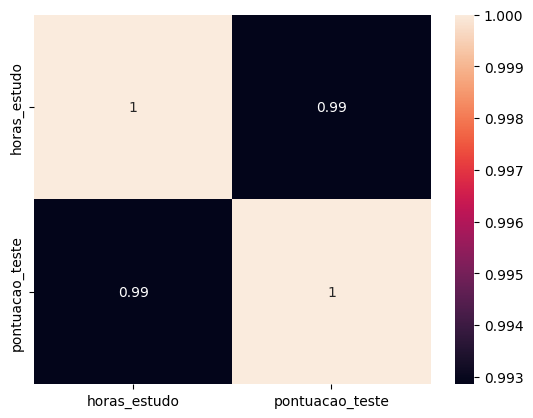

In [10]:
# verificar correlacao
sns.heatmap(df_pontuacao.corr('pearson'), annot=True)

<Axes: >

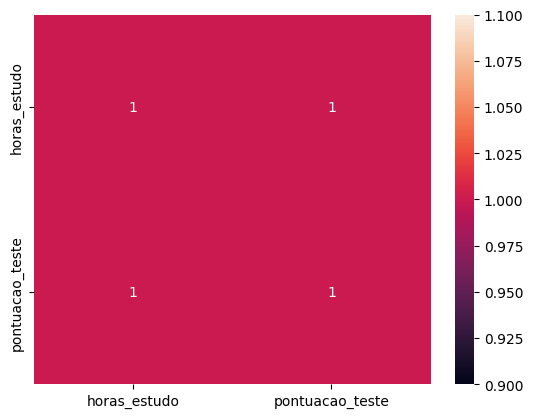

In [11]:
sns.heatmap(df_pontuacao.corr('spearman'), annot=True)

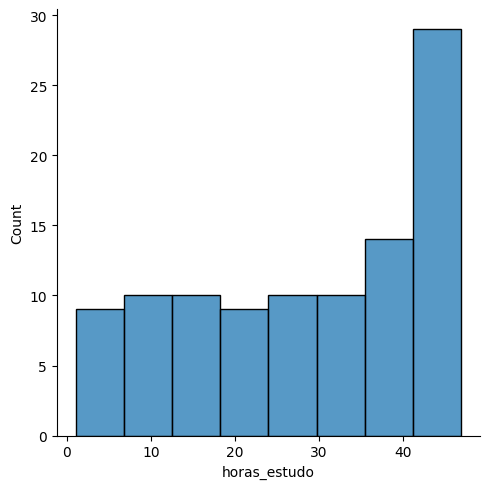

In [12]:
# Histograma
sns.displot(df_pontuacao, x='horas_estudo')

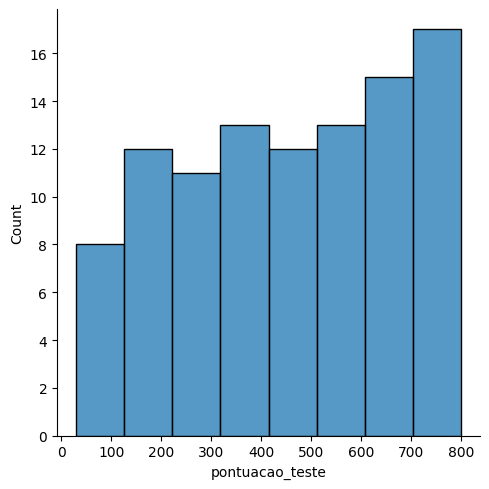

In [13]:
sns.displot(df_pontuacao, x='pontuacao_teste')

# Treinar modelo 

In [14]:
# Dividir dados entre treino e teste
# Quando temos apenas uma feature, precisamos ajustar o shape
x = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=50)

In [15]:
# Instanciar o modelo a ser treinado 
reg_model = LinearRegression()

In [16]:
# Treinar o modelo
reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Imprimir equacao da reta
# y=ax+b
a = reg_model.coef_
b = reg_model.intercept_
print(f"A equacao da reta é y = {a[0][0]:4f}x + {b[0]:4f}")

A equacao da reta é y = 15.642619x + 8.476601


# Validação de Metricas

In [18]:
# Predicao dos valores com base no conjunto de testes
y_pred = reg_model.predict(x_test)

In [19]:
# Calcular Metrica R-squares (coeficiente de determinação)
# r2 representa a proporcao da variação na variavel dependetne e é explicada pela variavel independente

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [20]:
# Calcular o MAE
# MAE = media(y_test-y_pred)
# MAE é menos sensivel a outliers

mean_absolute_error(y_test, y_pred)

22.957470277134615

In [21]:
# Calcular metrica MSE
# MSE = media(y_test - y_pred)**2
# mais sensivel a outliers e penaliza grandes erros
mean_squared_error(y_test, y_pred)

766.9972992416427

In [22]:
# Calcular metrica RMSE
# MSE = rais (media(y_test - y_pred)**2)   
# mais sensivel a outliers e penaliza grandes erros
# mean_squared_error(y_test, y_pred, squared= False) -> era pra rodar mas nao roda :)
# rodando manual
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 27.69471608884342


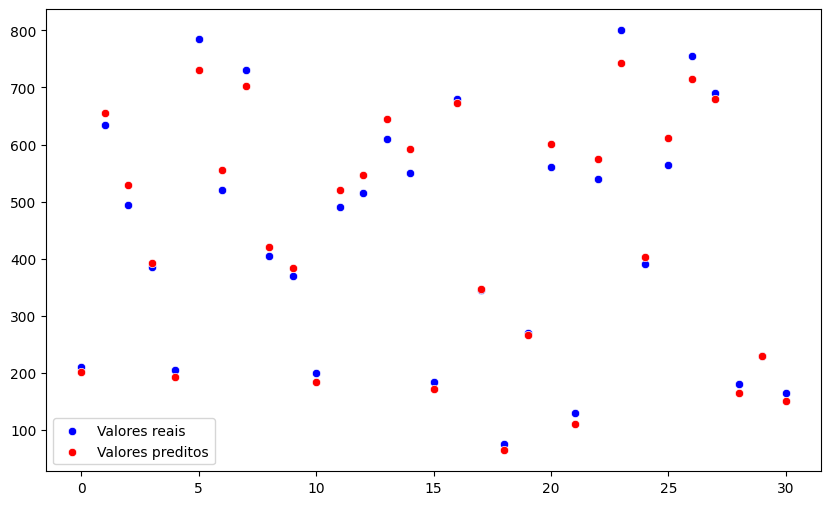

In [23]:
# analise grafica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores preditos')
plt.legend()
plt.show()

# Análise de Resíduos

In [24]:
# Calcular residuos
residuos = y_test  - y_pred

In [25]:
# Calcular residuos padronizados (standardization)
# Para cada elemento de um conjunto (x-media)/desvio_padrao
from scipy.stats import zscore
residuos_std = zscore(residuos)

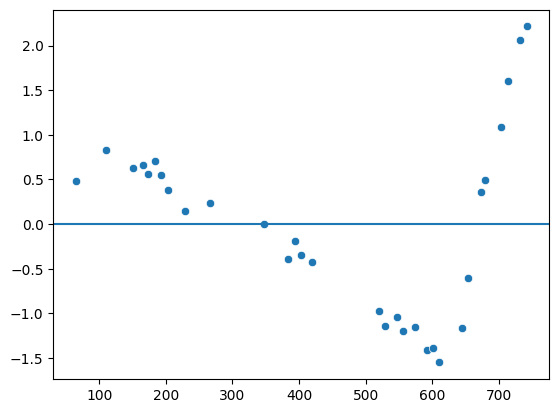

In [26]:
# Verificar linearidade do modelo
# Se os residuos estiverem entre 2 e -2 na escala padrao isso indica linearidade

# Verificar homogeneidade das variâncias (Homocedasticidade)
# Valores estiverem em torno da reta, temos homocedasticidade caso contrario 
# se tivermos alguma tendencia ou padrao há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1), y=residuos_std.reshape(-1))
plt.axhline(y=0)

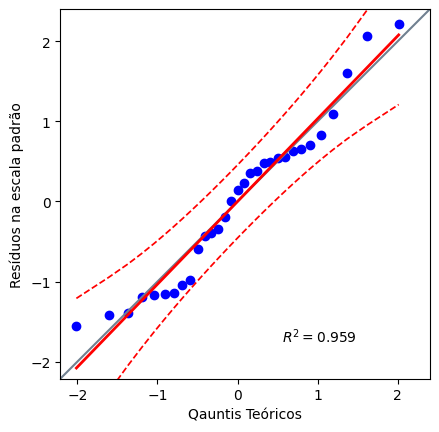

In [27]:
# Checar se residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia de uma amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Qauntis Teóricos')
plt.ylabel('Resíduos na escala padrão')
plt.show()

In [28]:
# Teste de Normalidade - Shapiro Wilk
# H0: segue distribuicao normal
# H1: Nao segue distribuicao normal
# Se o pvalor > 0.05 não rejeita h0, caso contrario rejeitamos

shat_shapiro, pvalue_shapiro = shapiro(residuos.reshape(-1))
print("Estatitica do teste {} e p-valor {}".format(shat_shapiro, pvalue_shapiro))

Estatitica do teste 0.9500532226161759 e p-valor 0.15663817850304973


In [29]:
# Teste de Normalidade - Kolmogorov=Shirnov
# H0: segue distribuicao normal
# H1: Nao segue distribuicao normal
# Se o pvalor > 0.05 não rejeita h0, caso contrario rejeitamos

shat_ks, pvalue_ks = kstest(residuos.reshape(-1), 'norm')
print("Estatitica do teste {} e p-valor {}".format(shat_ks, pvalue_ks))

Estatitica do teste 0.48355808450512827 e p-valor 3.395368995814077e-07


# Fazer predições com o modelo

In [31]:
# Se eu estudar 30.4 horas, qual a pontuação prevista ?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [ ]:
# Quantas horas estudar para obter 600 pontos pelo modelo
# y = ax + b
# (y-b)/a = x

(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(37.81485802710669)

## Salvar modelo para usar depois

In [36]:
import joblib
joblib.dump(reg_model, '.\modelo_regressao.pkl')

['.\\modelo_regressao.pkl']